In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml("mnist_784", version=1)
X_df = mnist["data"]
y_s = mnist["target"]

X = X_df.to_numpy()
y = y_s.to_numpy()

y = y.astype(np.uint8)

X_train: np.ndarray = X[:60000]
X_test: np.ndarray = X[60000:]
y_train: np.ndarray = y[:60000]
y_test: np.ndarray = y[60000:]

In [9]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rnf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(rnf_clf, {"n_estimators": [50, 100, 150]})
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

CPU times: user 1min 13s, sys: 2.41 s, total: 1min 15s
Wall time: 48.4 s


RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)

In [10]:
grid_search.score(X_test, y_test)

0.9707

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_reduced = pca.fit_transform(X_train)

In [12]:
%%time

rnf_clf_reduced = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(rnf_clf_reduced, {"n_estimators": [50, 100, 150]})
grid_search.fit(X_reduced, y_train)
grid_search.best_estimator_

CPU times: user 1min 57s, sys: 1.31 s, total: 1min 58s
Wall time: 1min 9s


RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)

In [13]:
X_test_reduced = pca.transform(X_test)

In [14]:
grid_search.score(X_test_reduced, y_test)

0.95

NOTES:
- For this dataset PCA reduced the performance significantly and almost doubled time

In [28]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [36]:
from sklearn.manifold import TSNE

np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X_small = mnist['data'][idx]
y_small = mnist['target'][idx]

tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state=42, n_jobs=-1)

In [37]:
%%time
X_2d = tsne.fit_transform(X_small)

CPU times: user 1min 7s, sys: 875 ms, total: 1min 8s
Wall time: 11.9 s


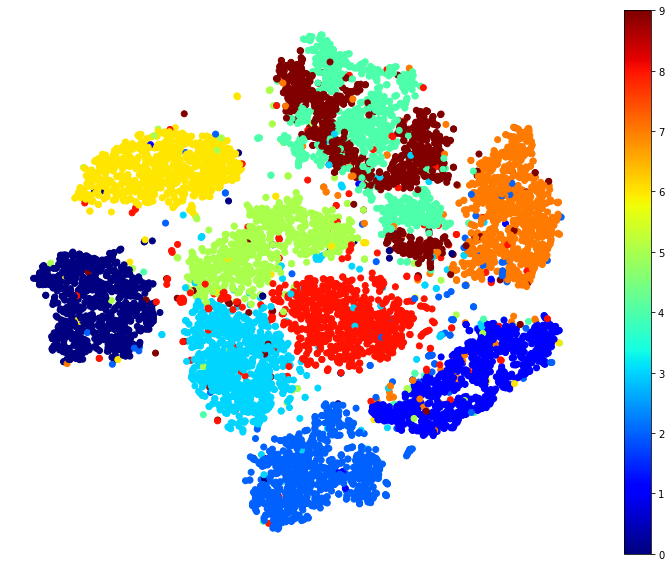

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_small, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

In [44]:
from sklearn.pipeline import Pipeline

# PCA is fast so running it before tse to drop as much dimensions as possible may significantly speed up the tsne process
pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, learning_rate='auto', init='random', random_state=42, n_jobs=-1)),
])

In [45]:
%%time
X_pca_tsne_reduced = pca_tsne.fit_transform(X_small)

CPU times: user 1min 4s, sys: 1.21 s, total: 1min 5s
Wall time: 11.5 s


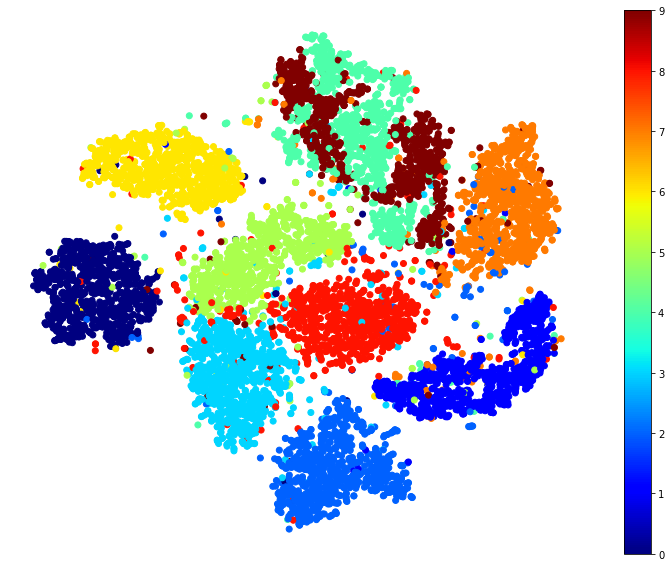

In [46]:
plt.figure(figsize=(13,10))
plt.scatter(X_pca_tsne_reduced[:, 0], X_pca_tsne_reduced[:, 1], c=y_small, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()